<a href="https://colab.research.google.com/github/2303A51249/AIML-2025BT17-18/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('Classified_Data.txt')

print(df.dtypes)
summary = df.describe(percentiles=[.25, .5, .75, .9])
print(summary)
print("Features/Columns in the dataset:", df.columns.tolist())
scaler = StandardScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1];
X_scaled = scaler.fit_transform(X)






Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object
        Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.223127     0.983470   
max     999.000000     1.721779 

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Confusion Matrix:
[[136   6]
 [  8 150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



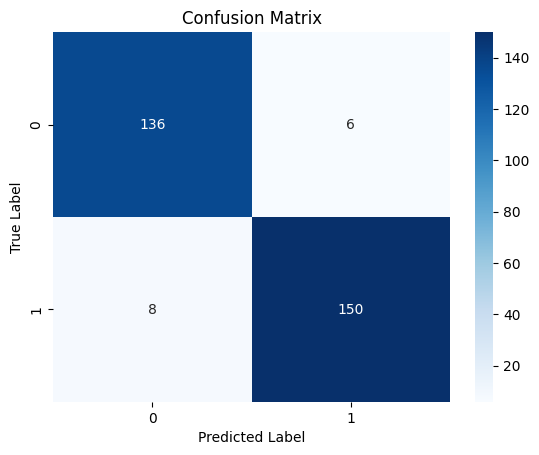

In [12]:

y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
